In [57]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('../data/cleaned.csv', index_col='id')

X = df[[col for col in df.columns if col != 'target']] # feature
y = df['target'] # Target variable

# I separated them as PCA does not care about target variable
# It cares only about variance 

In [59]:
pca = PCA()
pca.fit(X)

PCA()

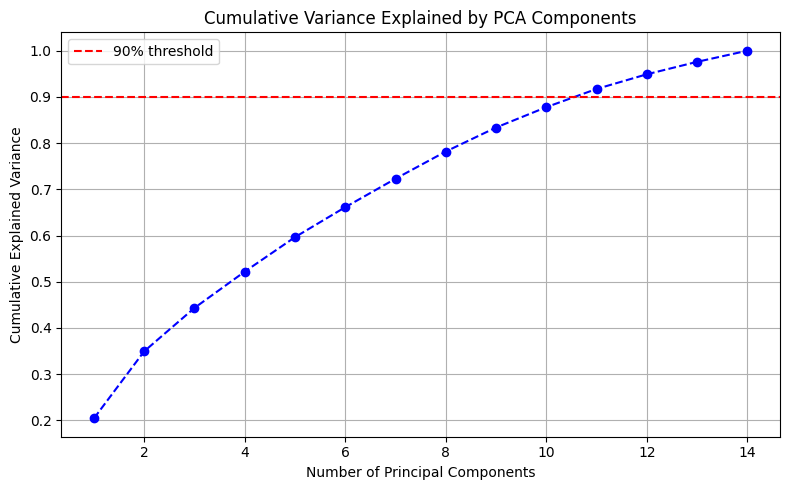

In [60]:
# explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance Explained by PCA Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--', label='90% threshold')
plt.legend()
plt.tight_layout()
plt.show()

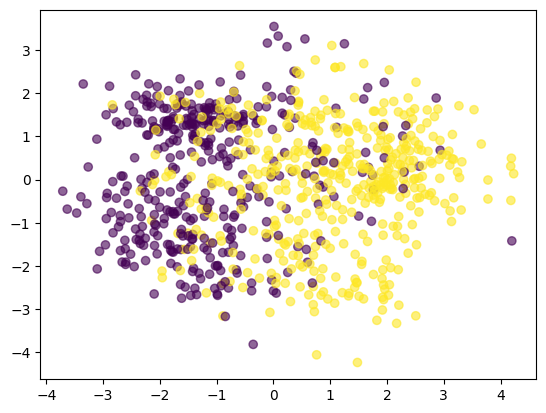

In [61]:
# with only 2 components to be able to make scatter plot
pca = PCA(n_components=2)
trans = pca.fit_transform(X)
plt.scatter(x=trans[:, 0], y=trans[:, 1], c=y, cmap='viridis', alpha=0.6)

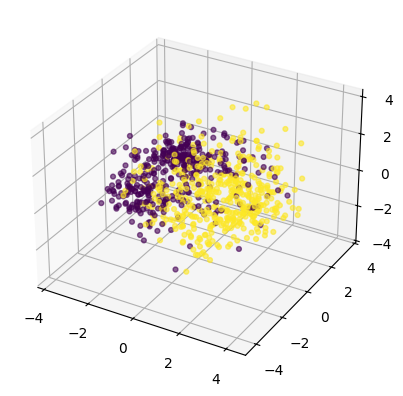

In [62]:
# with only 2 components to be able to make scatter plot
pca = PCA(n_components=3)
trans = pca.fit_transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(trans[:, 0],trans[:, 1],trans[:,2], c=y, cmap='viridis', alpha=0.6, s=12)

We can notice more separation in 3D and so on

In [63]:
# With optimal number of components (known from the plot)
# Changed to 3 to be able to plot
pca = PCA(n_components=3)
final = pca.fit_transform(X)

final = np.c_[final, y] # merge features and target variable

# Save as csv to use in another file
final = pd.DataFrame(final)
final.to_csv('../data/pca.csv')